# Libraries Setup

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=c015f57d758ecccbd5fb9ee5478dc48a5fb3896350c3827bdb945c74815ae70e
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-n

In [2]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
from google.colab import drive
mount_point = '/content/gdrive'
drive.mount(mount_point)

Mounted at /content/gdrive


# Authentication for Twitter API

In [4]:
# Authentication
consumerKey = "THcx2MtfbJ2ce2xjwwFfo50VD"
consumerSecret = "8h0yyJK0qmT6DFwOUqIJUNmBsiW2DRjTLNwIFEvVVvKFwcer5g"

accessToken = "1527324412181028868-zfKZrxBJrWm5dpAQ77bqhsgjGHMg23"
accessTokenSecret = "dFS8fia1B4b176ULW0TRukeRsqwU5p0DfDHcu9Jl0rev5"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Getting Tweets With Keyword or Hashtag

In [5]:
# Sentiment Analysis

def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search, q=keyword, lang='de').items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
 
 # print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score["neg"]
 neu = score["neu"]
 pos = score["pos"]
 comp = score["compound"]
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
    negative_list.append(tweet.text)
    negative += 1
  
 elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1
  
 elif pos == neg:
    neutral_list.append(tweet.text)
    neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: Vienna
Please enter how many tweets to analyze: 2500


In [6]:
# Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2500
positive number:  165
negative number:  592
neutral number:  1743


In [ ]:
# Saving the results
data = {'sentiment': ['total','positive','negative','neutral'],
        'twits': [len(tweet_list), len(positive_list), len(negative_list), len(neutral_list)]
        }

df = pd.DataFrame(data, columns= ['sentiment', 'twits'])

df.to_csv(r'/content/gdrive/MyDrive/AIA Studio/_sentiment analysis/_results.csv')

# Creating a PieChart

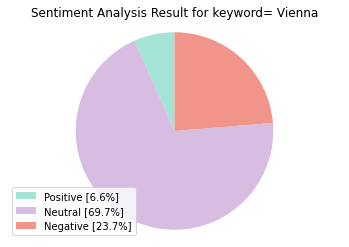

NameError: ignored

In [7]:
# Creating a PieChart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['#A3E4D7', '#D7BDE2','#F1948A']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

# save
fig.savefig('/content/gdrive/MyDrive/AIA Studio/_sentiment analysis/_pieresults.png')

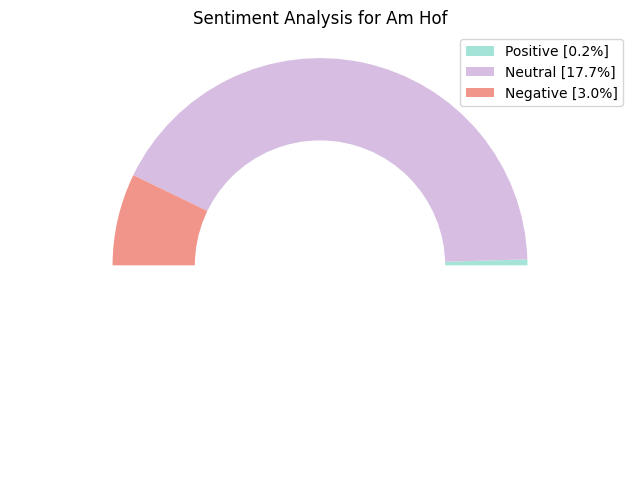

In [ ]:
# Creating a Semicircle Chart

# data
label = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
total = len(tweet_list)
positive = len(positive_list)
negative = len(negative_list)
neutral = len(neutral_list)
val = [positive, neutral, negative]

# append data and assign color
label.append("")
val.append(total)  # 50% blank
colors = ['#A3E4D7', '#D7BDE2', '#F1948A', 'white']

# plot
fig = plt.figure(figsize=(8,6),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.pie(val, colors=colors)
ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.legend(labels)
plt.title("Sentiment Analysis for "+keyword+"" )
plt.axis('equal')
plt.show()
fig.show()

# save
fig.savefig('/content/gdrive/MyDrive/AIA Studio/_sentiment analysis/_semiresults.png')

In [ ]:
# Twit List
tweet_list

,0
0,In Hof (Bayern) sind es am 16.06.2022 um 13:57...
1,Ablauf: Hausamslerich hockt am Balkon und bedü...
2,In Hof (Bayern) sind es am 16.06.2022 um 12:57...
3,@FranzrebKlaus @BMVg_Bundeswehr @oleksiireznik...
4,"RT @nana_theater: Gestatten: Louis XIII, König..."
...,...
622,"""Sichtbar - der Kunst- und Designmarkt"" findet..."
623,In Hof (Bayern) sind es am 07.06.2022 um 19:00...
624,In Hof (Bayern) sind es am 07.06.2022 um 17:56...
625,@Georg_Pazderski @klarnamemiggi Meßgewänder si...


# Cleaning Tweets to Analyse Sentiment

In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
# Cleaning Text (RT, Punctuation etc)
# Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

# Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,In Hof (Bayern) sind es am 16.06.2022 um 13:57...,( ) . . : ...
1,Ablauf: Hausamslerich hockt am Balkon und bedü...,: ü...
2,In Hof (Bayern) sind es am 16.06.2022 um 12:57...,( ) . . : ...
3,@FranzrebKlaus @BMVg_Bundeswehr @oleksiireznik...,"_ ,..."
4,"RT @nana_theater: Gestatten: Louis XIII, König...",": , ö . ..."
5,In Hof (Bayern) sind es am 16.06.2022 um 12:01...,( ) . . : ...
6,#SRFClub: Debatte am Grill: Darf man Tiere ess...,# : : ...
7,#Kuhcontent anyone? Elisabeth Scharang hat näm...,# ? ä ...
8,RT @ChristophSanta: Heute beginnen die Protest...,_ _ ...
10,Heute beginnen die Proteste von @AfD_ade_de ge...,_ _ ...


# Sentiment Analysis

In [ ]:
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
    tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
    tw_list.loc[index, 'sentiment'] = "positive"
 else:
    tw_list.loc[index, 'sentiment'] = "neutral"

 tw_list.loc[index, 'neg'] = neg
 tw_list.loc[index, 'neu'] = neu
 tw_list.loc[index, 'pos'] = pos
 tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,In Hof (Bayern) sind es am 16.06.2022 um 13:57...,( ) . . : ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
1,Ablauf: Hausamslerich hockt am Balkon und bedü...,: ü...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,In Hof (Bayern) sind es am 16.06.2022 um 12:57...,( ) . . : ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
3,@FranzrebKlaus @BMVg_Bundeswehr @oleksiireznik...,"_ ,...",0.0,0.0,neutral,0.0,1.0,0.0,0.0
4,"RT @nana_theater: Gestatten: Louis XIII, König...",": , ö . ...",0.0,0.0,neutral,0.0,0.0,0.0,0.0
5,In Hof (Bayern) sind es am 16.06.2022 um 12:01...,( ) . . : ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
6,#SRFClub: Debatte am Grill: Darf man Tiere ess...,# : : ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
7,#Kuhcontent anyone? Elisabeth Scharang hat näm...,# ? ä ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
8,RT @ChristophSanta: Heute beginnen die Protest...,_ _ ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
10,Heute beginnen die Proteste von @AfD_ade_de ge...,_ _ ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [ ]:
# Saving twits data frame
tw_list.to_csv(r'/content/gdrive/MyDrive/AIA Studio/_sentiment analysis/_tweets.csv')

In [ ]:
# Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
# Function for count_values_in single columns
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

# Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,972,98.68
positive,10,1.02
negative,3,0.30


# Create a Sentiment PieChart

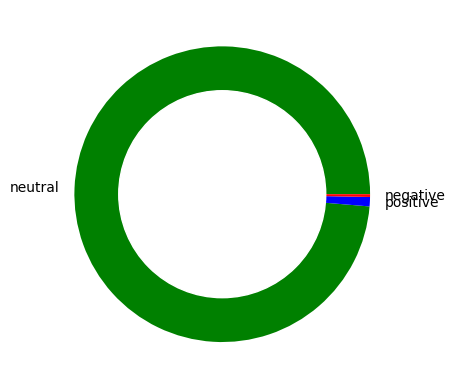

In [ ]:
# Create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()